# Neural & Behavioral Modeling - Week 14 (Examples)
by Tsung-Ren (Tren) Huang (tren.huang@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from time import sleep
from mpl_toolkits.mplot3d import Axes3D

## 1. Reinforcement Learning

### 1.1 Temporal Difference Learning

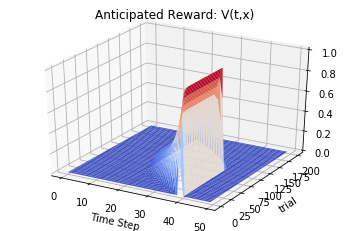

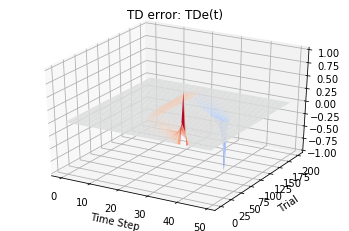

In [2]:
# Simulating the DA neuron responses:

a=0.3 # set learning rate
r=0.9 # temporal discounting
nTrials=200; # set number of trials
nTimes=50; # set number of time steps per trial
qTime=20; # set time of cue
rTime=40; # set time of reward

X=zeros(nTimes) # input vector 
X[qTime:rTime]=1 # binary status: 0=None; 1=Yes
R=zeros(nTimes)  # reward vector
R[rTime]=1 # binary status: 0=None; 1=Yes
V=zeros(nTimes) # value function V(X(t))
TDe=zeros(nTimes) # define prediction unit vector
V_history=zeros([nTrials,nTimes])
TDe_history=zeros([nTrials,nTimes])

for c in range(nTrials): # for each learning trial
    if(c==nTrials/2): R[rTime]=0 # remove reward for later trials
    for t in range(1,nTimes):
        TDe[t]=R[t]+r*V[t]-V[t-1] # TD error
        V[t-1]=V[t-1]+a*X[t-1]*TDe[t] # TD learning: V(X(t))
        #V[t-1]=V[t-1]+a*TDe[t] # TD learning: V(t)

    V_history[c,:]=V # save learned V(t) across trials
    TDe_history[c,:]=TDe # save learned TDe(t) across trials

# plot the results:
fig1=figure()
ax1=fig1.add_subplot(111, projection='3d')
[X,Y]=meshgrid(range(nTimes),range(nTrials))
#ax1.view_init(30, 30)
ax1.plot_surface(X,Y,V_history,cmap=cm.coolwarm)
xlabel('Time Step');ylabel('trial');
title('Anticipated Reward: V(t,x)');

fig2=figure(2);
ax2=fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X,Y,TDe_history,cmap=cm.coolwarm)
xlabel('Time Step');ylabel('Trial')
title('TD error: TDe(t)');

### 4.2 Q Learning
See "<a href="http://mnemstudio.org/path-finding-q-learning-tutorial.htm">A Painless Q-Learning Tutorial</a>" for more information.

<table>
<tr>
 <td><img src="http://mnemstudio.org/ai/path/images/agent_clip_image002.gif" width=80%></td>
 <td><img src="http://mnemstudio.org/ai/path/images/map3a.gif" width=80%></td>
</tr>
<tr>
 <td><img src="http://mnemstudio.org/ai/path/images/r_matrix1.gif" width=60%></td>
 <td><img src="http://mnemstudio.org/ai/path/images/q_matrix1.gif" width=60%></td>
</tr>
</table>
<img src="

In [5]:
# Reward matrix
R = matrix([[-1,-1,-1,-1,0,-1],
           [-1,-1,-1,0,-1,100],
           [-1,-1,-1,0,-1,-1],
           [-1,0,0,-1,0,-1],
           [-1,0,0,-1,-1,100],
           [-1,0,-1,-1,0,100]])

# Q matrix
Q = matrix(np.zeros([6,6]))

# Gamma (learning parameter).
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state) 

# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(random.choice(available_act,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = where(Q[current_state,] == max(Q[current_state,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[current_state, max_index]
    
    # Q learning formula with the learning rate a=1
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Update Q matrix
update(initial_state,action,gamma)

#-------------------------------------------------------------------------------
# Training

# Train over 10000 iterations. (Re-iterate the process above).
for i in range(10000):
    current_state = random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    
# Normalize the "trained" Q matrix
print("Learned Q matrix:")
print(Q/np.max(Q)*100)

#-------------------------------------------------------------------------------
# Testing

# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1/4, 5

current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = where(Q[current_state,] == max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

Learned Q matrix:
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.  64.   0.   0.   0. 100.]]
Selected path:
[2, 1, 5]
